Jessica Ratovondranto

Doris Allamani

Master 2: Quantitative finance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
data = pd.read_csv("C:\\Users\\33620\\Downloads\\trading_data.csv", index_col = None)
data.drop('Unnamed: 0', axis =1, inplace = True)
data.head()

,midprice,id,buy/sell,answeredprice,deal
0,97.9990,4,1,98.016,0.0
1,97.9988,4,-1,98.001,1.0
2,97.9951,1,-1,97.979,0.0
3,97.9971,1,1,97.990,1.0
4,97.9961,1,-1,97.978,0.0


#### Question 1:
In this question we ignore the identity of clients and consider that they all have the same behaviour, i.e. $\alpha^c$ and $\beta^c$ are independent of c : we denote them by $\alpha$ and $\beta$.

Write a notebook to estimate $\alpha$ and $\beta$ using the dataset, and then evaluate the probability of a trade for each of
the last 200 requests (rows).


In [3]:
%%time
#create a price difference
diff = np.empty(len(data))
for i in range(len(data)):
    if data["buy/sell"][i]==1:#buy
        diff[i] = data["answeredprice"][i] - data["midprice"][i]
    else:#sell
        diff[i] = data["midprice"][i] - data["answeredprice"][i]
data["diff"] = diff

Wall time: 57.2 ms


##### Create features (train data)

In [4]:
data_train = data[data['deal'].isna()==False]

In [5]:
X_data_train = data_train["diff"].values.reshape(-1,1)
y_data_train = list(map(int,data_train["deal"].values)) # This is to transform float data to int

#####  Create Logistic regression

In [6]:
lr = LogisticRegression(penalty='none',random_state=None).fit(X_data_train, y_data_train)
lr

LogisticRegression(penalty='none')

##### Estimate parameter

In [7]:
print("alpha:{}".format(-lr.intercept_))#estimation of alpha
print("beta:{}".format(-lr.coef_[0]) )#estimation of beta

alpha:[-0.63275931]
beta:[339.65335145]


##### Estimate the probability of trade 

In [8]:
test_data = data[data['deal'].isna()]#test set on the 200 last rows

In [72]:
X_test = test_data["diff"].values.reshape(-1,1)
result_proba = pd.DataFrame(lr.predict_proba(X_test))
result_proba.rename(columns = {0:'P(\'deal\' = 0)', 1:'P(\'deal\' = 1)'}, inplace = True)
result_proba

,P('deal' = 0),P('deal' = 1)
0,0.241909,0.758091
1,0.003591,0.996409
2,0.995852,0.004148
3,0.012094,0.987906
4,0.037396,0.962604
...,...,...
195,0.295147,0.704853
196,0.992635,0.007365
197,0.921151,0.078849
198,0.085882,0.914118


##### Confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_data_train, lr.predict(X_data_train))
print("confusion_matrix:{}".format(confusion_mat))

confusion_matrix:[[848 105]
 [114 933]]


##### Plot confusion matrix

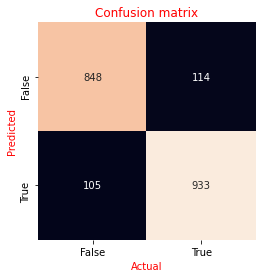

In [45]:
T_or_F = [False, True]
%matplotlib inline
plt.subplots(figsize = (12,4))
sns.heatmap(confusion_mat.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels =T_or_F, yticklabels = T_or_F)
plt.xlabel('Actual').set_color('red')
plt.ylabel('Predicted').set_color('red')
plt.title('Confusion matrix').set_color('red')

 On the left column, we have a total 848 + 105 classified as False, of which classifier predicted correctly 848 times which are true Negatives. However, the classifier predicted it wrongly 105 times, that are false negatives. On the right column, we have 114 + 933  classified as True.
 The classifier predicted wrongly 114 times, that the False positives. The classifier did predict 933 times, that the True positives

##### Accuracy, precision, F1_score, recall

In [12]:
from sklearn.metrics import classification_report
print("Report:{}".format(classification_report(y_data_train, lr.predict(X_data_train))))

Report:              precision    recall  f1-score   support

           0       0.88      0.89      0.89       953
           1       0.90      0.89      0.89      1047

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



#### Question 2:
We now consider client ids. Among the 4 clients, there are in fact two types of clients. Propose and code in the
notebook a method that classifies the clients into two relevant groups as far as their behaviour is concerned.

 This is not a supervised learning. By saying classify the clients into two groups, we need to do a clustering. But we
don't have the target dataset as trainning y so it isn't a supervised learning task.

In [13]:
set(data['id'].values)

{1, 2, 3, 4}

In [14]:
data['differences'] = data['answeredprice'] - data['midprice']

In [15]:
client1 = data[data['id']==1]
client2 = data[data['id']==2]
client3 = data[data['id']==3]
client4 = data[data['id']==4]

In [16]:
data_train_client1 = client1[client1['deal'].isna()==False]
data_train_client2 = client2[client2['deal'].isna()==False]
data_train_client3 = client3[client3['deal'].isna()==False]
data_train_client4 = client4[client4['deal'].isna()==False]

In [17]:
X_data_train_client1 = data_train_client1["diff"].values.reshape(-1,1)
y_data_train_client1 = list(map(int,data_train_client1["deal"].values)) # This is to transform float data to int
lr_client1 = LogisticRegression(penalty='none',random_state=None).fit(X_data_train_client1.reshape(-1,1), y_data_train_client1)
print("beta_client1:{}".format(-lr_client1.coef_))
print("alpha_client1:{}".format(-lr_client1.intercept_))

beta_client1:[[775.14332635]]
alpha_client1:[-0.58134604]


In [18]:
X_data_train_client2 = data_train_client2["diff"].values.reshape(-1,1)
y_data_train_client2 = list(map(int,data_train_client2["deal"].values)) # This is to transform float data to int
lr_client2 = LogisticRegression(penalty='none',random_state=None).fit(X_data_train_client2.reshape(-1,1), y_data_train_client2)
print("beta_client2:{}".format(-lr_client2.coef_))
print("alpha_client2:{}".format(-lr_client2.intercept_))

beta_client2:[[239.21083863]]
alpha_client2:[-0.70976872]


In [19]:
X_data_train_client3 = data_train_client3["diff"].values.reshape(-1,1)
y_data_train_client3 = list(map(int,data_train_client3["deal"].values)) # This is to transform float data to int
lr_client3 = LogisticRegression(penalty='none',random_state=None).fit(X_data_train_client3.reshape(-1,1), y_data_train_client3)
print("beta_client3:{}".format(-lr_client3.coef_))
print("alpha_client3:{}".format(-lr_client3.intercept_))

beta_client3:[[681.66111117]]
alpha_client3:[-0.36150038]


In [20]:
X_data_train_client4 = data_train_client4["diff"].values.reshape(-1,1)
y_data_train_client4 = list(map(int,data_train_client4["deal"].values)) # This is to transform float data to int
lr_client4 = LogisticRegression(penalty='none',random_state=None).fit(X_data_train_client4.reshape(-1,1), y_data_train_client4)
print("beta_client4:{}".format(-lr_client4.coef_))
print("alpha_client4:{}".format(-lr_client4.intercept_))

beta_client4:[[285.36073967]]
alpha_client4:[-0.92044294]


In [21]:
alpha = pd.DataFrame({"client1":-lr_client1.intercept_, 
                     "client2":-lr_client2.intercept_, 
                     "client3":-lr_client3.intercept_, 
                     "client4":-lr_client4.intercept_})

In [22]:
beta = pd.DataFrame({"client1":-lr_client1.coef_[0], 
                     "client2":-lr_client2.coef_[0],
                     "client3":-lr_client3.coef_[0],
                     "client4":-lr_client4.coef_[0],})

##### Classify client into two groups

In [23]:
classify_client = pd.concat([alpha,beta],ignore_index=True,axis = 0)#this concatenate the 2 dataframe alpha and beta
classify_client

,client1,client2,client3,client4
0,-0.581346,-0.709769,-0.361500,-0.920443
1,775.143326,239.210839,681.661111,285.360740


In [24]:
classify_client.index = ["alpha", "beta"]

In [25]:
classify_client

,client1,client2,client3,client4
alpha,-0.581346,-0.709769,-0.361500,-0.920443
beta,775.143326,239.210839,681.661111,285.360740


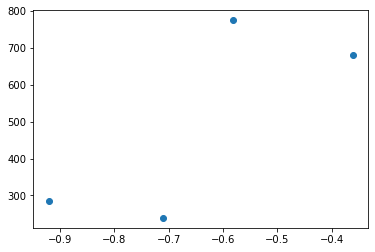

In [26]:
plt.scatter(classify_client.iloc[0],classify_client.iloc[1])
plt.show()

##### Clustering

In [27]:
classify_client

,client1,client2,client3,client4
alpha,-0.581346,-0.709769,-0.361500,-0.920443
beta,775.143326,239.210839,681.661111,285.360740


In [28]:
kmean = KMeans(n_clusters = 2)
kmean.fit(classify_client.T)

KMeans(n_clusters=2)

In [29]:
group = kmean.predict(classify_client.T)
group

array([1, 0, 1, 0])

In [30]:
classify_client.loc["group"] = group
classify_client

,client1,client2,client3,client4
alpha,-0.581346,-0.709769,-0.361500,-0.920443
beta,775.143326,239.210839,681.661111,285.360740
group,1.000000,0.000000,1.000000,0.000000


In [31]:
classify_client= classify_client.T

In [32]:
classify_client['group'] = classify_client['group'].astype(np.int8)
classify_client

,alpha,beta,group
client1,-0.581346,775.143326,1
client2,-0.709769,239.210839,0
client3,-0.361500,681.661111,1
client4,-0.920443,285.360740,0


We can see that the client 1 and 3 have the same behaviour, and client 2 and 4 have the same behaviour.

##### Another method for clustering

In [74]:
data_train['Prediction'] =  lr.predict(X_data_train)
data_train.head()

<ipython-input-74-e080a55c2e72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Prediction'] =  lr.predict(X_data_train)


,midprice,id,buy/sell,answeredprice,deal,diff,Prediction
0,97.9990,4,1,98.016,0.0,0.0170,0
1,97.9988,4,-1,98.001,1.0,-0.0022,1
2,97.9951,1,-1,97.979,0.0,0.0161,0
3,97.9971,1,1,97.990,1.0,-0.0071,1
4,97.9961,1,-1,97.978,0.0,0.0181,0


##### Analyzing the False Positives and False negatives for the first regression


In [57]:
e=[[0, 0, 0],
  [0, 0, 0]]
for j in range(2):
    a,b,c,d =0, 0, 0, 0 #initialize a counting
    for i in range(len(data_train)):
        if (data_train.iloc[i]['deal'] != data_train.iloc[i]['Prediction']) & (data_train.iloc[i]['deal'] == j):
            if(data_train.iloc[i]['id'] == 1):#compute the number of client 1 who do not  matches with prediction:  deal or not_deal
                a += 1
            elif(data_train.iloc[i]['id'] == 2):#compute the number of client 2 who do not matches with prediction: deal or not_deal
                b += 1
            elif(data_train.iloc[i]['id'] == 3):#compute the number of client 3 who do not matches with prediction: deal or not_deal
                c += 1
            else:                              #compute the number of client 4 who do not  matches with prediction: deal or not_deal
                d += 1
        e[j] = [a, b, c, d]           
d = {'Predicted 1 Actual 0': e[0], ' Predicted 0 Actual 1': e[1] }
pd.DataFrame(data=d, index=['client1', 'client2', 'client3', 'client4'])


,Predicted 1 Actual 0,Predicted 0 Actual 1
client1,27,4
client2,34,48
client3,21,9
client4,23,53


From the above table, we may say that from the clients 2 and 4 there were more false postives then from the other clients, we may say that they prefered to have a deal with the trader. To have more insite into this problem, we analyze further our dataset.

In [56]:
a = data_train_client1[(data_train_client1['differences']>=0) & (data_train_client1['buy/sell'] == 1)]
b = data_train_client2[(data_train_client2['differences']>=0) & (data_train_client2['buy/sell'] == 1)]
c = data_train_client3[(data_train_client3['differences']>=0) & (data_train_client3['buy/sell'] == 1)]
d = data_train_client4[(data_train_client4['differences']>=0) & (data_train_client4['buy/sell'] == 1)]
e = pd.DataFrame(a['deal'].value_counts())
f = pd.DataFrame(b['deal'].value_counts())
g = pd.DataFrame(c['deal'].value_counts())
h = pd.DataFrame(d['deal'].value_counts())
e.rename(columns = {'deal':'deal_client_1'}, inplace = True)
f.rename(columns = {'deal':'deal_client_2'}, inplace = True)
g.rename(columns = {'deal':'deal_client_3'}, inplace = True)
h.rename(columns = {'deal':'deal_client_4'}, inplace = True)
print('\033[1m' + 'The number of clients willing to buy,\n with a higher answered price then initial price. ' + '\033[0m')                                                            
data1 = pd.concat([e, f, g, h], axis = 1) #merging the 4 datasets into one
data1

The number of clients willing to buy,
 with a higher answered price then initial price. 


,deal_client_1,deal_client_2,deal_client_3,deal_client_4
0.0,131,102,104,105
1.0,10,30,10,32


Float64Index([0.0, 1.0], dtype='float64')

The above table displays the number of clients willing to buy bonds from which the answered price was higher then the reference price of the bond at the time of the request.

It should be that there would be more 'no deal' as for the client the profit is negative, but given the information on the table, the number of clients from group 2 and 4 which have decided for 'deal-buying the bond', is higher then from clients 1 and 3. 

We coclude that clients who wants to buy bonds from group 1 and 3 are more rational then clients from group 2 and 4.

In [36]:
a = data_train_client1[(data_train_client1['differences']<0) & (data_train_client1['buy/sell'] == -1)]
b = data_train_client2[(data_train_client2['differences']<0) & (data_train_client2['buy/sell'] == -1)]
c = data_train_client3[(data_train_client3['differences']<0) & (data_train_client3['buy/sell'] == -1)]
d = data_train_client4[(data_train_client4['differences']<0) & (data_train_client4['buy/sell'] == -1)]
e = pd.DataFrame(a['deal'].value_counts())
f = pd.DataFrame(b['deal'].value_counts())
g = pd.DataFrame(c['deal'].value_counts())
h = pd.DataFrame(d['deal'].value_counts())
e.rename(columns = {'deal':'deal_client_1'}, inplace = True)
f.rename(columns = {'deal':'deal_client_2'}, inplace = True)
g.rename(columns = {'deal':'deal_client_3'}, inplace = True)
h.rename(columns = {'deal':'deal_client_4'}, inplace = True)
print('\033[1m' + 'The number of clients willing to sell,\n with a lower answered price then initial price. ' + '\033[0m')                                                            
pd.concat([e, f, g, h], axis = 1)

The number of clients willing to sell,
 with a lower answered price then initial price. 


,deal_client_1,deal_client_2,deal_client_3,deal_client_4
0.0,109,106,135,100
1.0,11,34,6,34


The above table displays the number of clients willing to sell from which the answered price was lower then the reference price of the bond at the time of the request.

It should be that there would be more 'no deal' as for the clients the profit is negative, but given the information on the table, the number of clients from group 2 and 4 which have decided for 'deal- selling the bond', is higher then from clients 1 and 3. 

We conclude that clients who wants to sell bonds from group 1 and 3 are more rational then clients from group 2 and 4.

Given the preferences of clients, we conclude that the clients from group 1 and 3 will be merged together and the clients from group 2 and 4 will be merged together.

#### Question 3:
Using the identity of clients and the results of Question 2, propose and code in the notebook a new algorithm to
evaluate the probability of a trade for each of the last 200 requests (rows).

In the previous question, we have seen that client 1, 3 in group 1 and client 2,4 in group 2

In [58]:
#create a new data for group 1
data1 = [False]*len(data)
for i in range(len(data)):
    if data['id'][i] == 1 or data['id'][i] ==3:
        data1[i] = True
group1= data[data1]
group1

,midprice,id,buy/sell,answeredprice,deal,diff,differences
2,97.9951,1,-1,97.979,0.0,0.0161,-0.0161
3,97.9971,1,1,97.990,1.0,-0.0071,-0.0071
4,97.9961,1,-1,97.978,0.0,0.0181,-0.0181
6,97.9910,1,1,97.981,1.0,-0.0100,-0.0100
7,97.9917,1,-1,97.987,0.0,0.0047,-0.0047
...,...,...,...,...,...,...,...
2188,97.9901,3,-1,97.972,NaN,0.0181,-0.0181
2191,97.9965,3,1,97.992,NaN,-0.0045,-0.0045
2192,97.9992,1,-1,98.009,NaN,-0.0098,0.0098
2195,97.9943,1,-1,97.995,NaN,-0.0007,0.0007


In [38]:
#create a new data for group 2
group2 = data[np.array(data1) == False]
group2

,midprice,id,buy/sell,answeredprice,deal,diff,differences
0,97.9990,4,1,98.016,0.0,0.0170,0.0170
1,97.9988,4,-1,98.001,1.0,-0.0022,0.0022
5,97.9935,2,-1,98.005,1.0,-0.0115,0.0115
8,97.9898,4,1,97.984,1.0,-0.0058,-0.0058
9,97.9868,4,1,97.969,1.0,-0.0178,-0.0178
...,...,...,...,...,...,...,...
2193,97.9962,4,-1,98.001,NaN,-0.0048,0.0048
2194,97.9970,2,-1,97.996,NaN,0.0010,-0.0010
2196,97.9977,2,1,98.014,NaN,0.0163,0.0163
2198,98.0019,2,-1,98.007,NaN,-0.0051,0.0051


##### Create a train data and logistic regression for group1 

In [39]:
set(group1['id'].values)

{1, 3}

In [40]:
set(group2['id'].values)

{2, 4}

In [41]:
group1_train = group1[group1["deal"].isna()==False]
X_group1_train = group1_train["diff"].values.reshape(-1,1)
y_group1_train = list(map(float,group1_train["deal"].values)) # This is to transform float data to int
lr_group1 = LogisticRegression(penalty='none').fit(X_group1_train,y_group1_train)

##### Predict the probability of trading of group1

In [59]:
group1_test = group1[group1["deal"].isna()]# test set on  the 200 last rows on the data
X_group1_test = group1_test["diff"].values.reshape(-1,1)
result_group1 = pd.DataFrame(lr_group1.predict_proba(X_group1_test))
result_group1.rename(columns = {0:'P(\'deal\' = 0)', 1:'P(\'deal\' = 1)'}, inplace = True)
result_group1

,P('deal' = 0),P('deal' = 1)
0,0.173615,0.826385
1,0.021819,0.978181
2,0.999877,0.000123
3,0.862944,0.137056
4,0.994728,0.005272
...,...,...
87,0.999997,0.000003
88,0.023418,0.976582
89,0.000518,0.999482
90,0.272601,0.727399


##### Create a train data and logistic regression for group2

In [43]:
group2_train = group2[group2["deal"].isna()==False]
X_group2_train = group2_train["diff"].values.reshape(-1,1)
y_group2_train = list(map(int,group2_train["deal"].values)) # This is to transform float data to int
lr_group2 = LogisticRegression(penalty='none').fit(X_group1_train,y_group1_train)
lr_group2

LogisticRegression(penalty='none')

##### Predict the probality for trading of group 2

In [60]:
group2_test = group2[group2["deal"].isna()]#test set on the 200 last rows
X_group2_test = group2_test["diff"].values.reshape(-1,1)
result_group2 = pd.DataFrame(lr_group2.predict_proba(X_group2_test))
result_group2.rename(columns = {0:'P(\'deal\' = 0)', 1:'P(\'deal\' = 1)'}, inplace = True)
result_group2

,P('deal' = 0),P('deal' = 1)
0,0.000015,0.999985
1,0.999996,0.000004
2,0.000202,0.999798
3,0.002363,0.997637
4,0.900401,0.099599
...,...,...
103,0.018936,0.981064
104,0.561779,0.438221
105,0.999988,0.000012
106,0.015298,0.984702
